# Модель машинного обучения для предсказания веса морских черепах


- Придумайте тетрадке заголовок, который хорошо описывает решаемую задачу.
- Кратко, но понятно опишите решаемую задачу.

Разработать модель линейной регрессии, которая будет использоватьпредоставляемые данные для предсказания массы черепах.

## Постановка задачи машинного обучения

- Опишите, какую задачу нужно решить: регрессии или классификации.
- Выберите поле, которое станет целевой переменной.
- Назовите метрики качества модели, которые планируете использовать.
- Опишите критерии успешности проекта с опорой на метрики.

Необходимо решить задачу регрессии и составить линейную модель для предсказания непрерывного вещественного числа являющегося весом черепахи. Соответсвенно вес - целевая переменная. В силу разброса значений необходимо использоватиь loss-функцию MAE из-за её устойчивости к выбросам. Требуемый коэффициент детерминации (R²) >= 0.97, средняя абсолютная ошибка (MAE) <= 5.

## Подключение и настройка библиотек

В блоке кода ниже, помимо уже указанных библиотек, импортируйте все остальные, которые планируете использовать для проекта.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, SGDRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score,mean_absolute_error
import matplotlib.pyplot as plt

## Загрузка датасета

- Загрузите данные из файла `turtles.csv`, путь к файлу: `'/datasets/turtles.csv'`. При использовании метода [read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) установите правильные значения для параметров `sep` и `decimal`: в качестве разделителя столбцов используйте символ табуляции (`'\t'`), а в качестве разделителя дробной части — запятую.
- Проверьте, правильно ли прошла загрузка. Данные должны соответствовать описанию в тексте урока.
- С помощью методов библиотеки pandas выведите общие сведения о данных.
- Возможно ли продолжать работу? Если нет — что нужно сделать, чтобы устранить препятствия?

In [2]:

# Загрузка данных с указанными параметрами
data = pd.read_csv('/datasets/turtles.csv', sep='\t', decimal=',')
print(data.info())
data.head(5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8861 entries, 0 to 8860
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   8861 non-null   int64  
 1   binomial_name        8812 non-null   object 
 2   registration number  8832 non-null   object 
 3   shell_length         8774 non-null   float64
 4   shell_width          8861 non-null   int64  
 5   head_length          8715 non-null   float64
 6   head_width           8715 non-null   float64
 7   flipper_length_1     8861 non-null   int64  
 8   flipper_width_1      8861 non-null   int64  
 9   flipper_length_2     8861 non-null   int64  
 10  flipper_width_2      8861 non-null   int64  
 11  flipper_length_3     8760 non-null   float64
 12  flipper_width_3      8760 non-null   float64
 13  flipper_length_4     8760 non-null   float64
 14  flipper_width_4      8760 non-null   float64
 15  circle_count         8861 non-null   i

,id,binomial_name,registration number,shell_length,shell_width,head_length,head_width,flipper_length_1,flipper_width_1,flipper_length_2,flipper_width_2,flipper_length_3,flipper_width_3,flipper_length_4,flipper_width_4,circle_count,measure_count,shell_crack,timestamp,weight
0,20438,Caretta caretta,d89af72662f49ece4d09dec75a8b0166,700.0,381,112.0,82.0,356,205,331,185,270.0,180.0,273.0,144.0,63,3.0,NaN,1703159226,87.687
1,19034,Lepidochelys olivacea,1579c64777de4db1c16e8b7b0d19c45e,341.0,295,65.0,48.0,216,190,229,186,164.0,182.0,180.0,149.0,0,1.0,1.0,1689428175,26.949
2,24689,LEPIDOCHELYS OLIVACEA,bfcec01187569615087e4d777c44985a,408.0,343,71.0,70.0,308,224,285,232,264.0,179.0,268.0,176.0,0,3.0,NaN,1745783111,30.016
3,17945,Lepidochelys Olivacea,2c159675aa28f0ea566fce2090bf4c82,512.0,432,98.0,95.0,334,317,364,284,NaN,NaN,NaN,NaN,3,4.0,1.0,1677757151,33.917
4,24543,lepidochelys olivacea,ecd22499761e2ac56a6d8eb765ec566d,408.0,307,50.0,54.0,280,168,269,218,199.0,165.0,209.0,180.0,0,4.0,1.0,1744455613,28.511


Итак данные имеют просто огромное число данных о разных видах черепах и пропусков с которыми надо разобраться.

## Исследовательский анализ данных

Проведите исследовательский анализ данных:
1. Выясните, данные о каких черепахах представлены в датасете.
2. Проведите отбор записей о нужном виде черепах. Для дальнейшей работы достаточно изучить только *Chelonia mydas*. При этом вы можете сравнить распределение данных об этих черепахах с другими видами, если есть желание и время.
3. Определите, все ли признаки можно использовать для решения задачи. Ответ обоснуйте. Удалите признаки, которые вам никак не помогут.
4. Проверьте, есть ли в данных пропуски. Определите, какие из них можно обработать сразу, а в каких случаях лучше сперва провести разделение на выборки. Решите, стоит ли удалить некоторые пропуски.
5. Определите, есть ли в данных дубликаты. Выберите корректный способ их обработки.
6. Проанализируйте распределение признаков, постройте необходимые для этого визуализации: ящики с усами, гистограммы и так далее. Определите, есть ли в данных выбросы и какие из них критичные. Решите, можно ли их сразу исправить.
7. Проверьте, одинаков ли масштаб признаков. Если он различается, предложите решение этой проблемы.
8. Проанализируйте корреляцию между признаками и целевой переменной с помощью вычислений и графически. Определите, все ли признаки нужны для дальнейшей работы.
9. Проверьте данные на мультиколлинеарность и решите, можно ли её устранить.

In [3]:
#рассмотрим какие виды черепах присутствуют
data['binomial_name'] = data['binomial_name'].str.lower()
data['binomial_name'].unique()

array(['caretta caretta', 'lepidochelys olivacea', 'chelonia mydas',
       'eretmochelys imbricata', 'dermochelys coriacea', nan,
       'lepidochelys kempii'], dtype=object)

Из всего перечисленного для нас интересна только chelonia mydas. Также считаю необходимым избавиться от столбцов id и registration number - обозначающего порядковый номер измерения/особи и никак не связанный с итоговым целевой переменной.  

In [4]:
data = data.drop(columns='id')
data = data.drop(columns='registration number')
data = data[data['binomial_name'] == 'chelonia mydas']

#ну и поскольку все черепахи морские нет смысла хранить их вид
data = data.drop(columns='binomial_name')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2829 entries, 8 to 8859
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   shell_length      2794 non-null   float64
 1   shell_width       2829 non-null   int64  
 2   head_length       2790 non-null   float64
 3   head_width        2790 non-null   float64
 4   flipper_length_1  2829 non-null   int64  
 5   flipper_width_1   2829 non-null   int64  
 6   flipper_length_2  2829 non-null   int64  
 7   flipper_width_2   2829 non-null   int64  
 8   flipper_length_3  2798 non-null   float64
 9   flipper_width_3   2798 non-null   float64
 10  flipper_length_4  2798 non-null   float64
 11  flipper_width_4   2798 non-null   float64
 12  circle_count      2829 non-null   int64  
 13  measure_count     2748 non-null   float64
 14  shell_crack       677 non-null    float64
 15  timestamp         2829 non-null   int64  
 16  weight            2826 non-null   float64


У нас осталось 2829 строк и 17 столбцов потенциально полезной информации. Продолжим обработку. Заполнить искусственными данными длину/ширину головы/панциря/ласт мы не можем т.к. это сильно повлияет на предсазания поэту придётся удалить строки с пропусками в них.

In [5]:
data_2 = data.dropna(subset=["shell_length", 'shell_width', 'head_length', 'head_width','flipper_length_3', 'weight'])
data_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2724 entries, 8 to 8859
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   shell_length      2724 non-null   float64
 1   shell_width       2724 non-null   int64  
 2   head_length       2724 non-null   float64
 3   head_width        2724 non-null   float64
 4   flipper_length_1  2724 non-null   int64  
 5   flipper_width_1   2724 non-null   int64  
 6   flipper_length_2  2724 non-null   int64  
 7   flipper_width_2   2724 non-null   int64  
 8   flipper_length_3  2724 non-null   float64
 9   flipper_width_3   2724 non-null   float64
 10  flipper_length_4  2724 non-null   float64
 11  flipper_width_4   2724 non-null   float64
 12  circle_count      2724 non-null   int64  
 13  measure_count     2644 non-null   float64
 14  shell_crack       651 non-null    float64
 15  timestamp         2724 non-null   int64  
 16  weight            2724 non-null   float64


Теперь исследуем данные о количестветрещин

In [6]:
print(data_2['shell_crack'].describe())

count    651.000000
mean       1.748080
std        1.249421
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        5.000000
Name: shell_crack, dtype: float64


Видимо количество трещин Nan нужно заменить на 0 а в количестве измерений на 1 как на среднее 

In [7]:
data_2['shell_crack'] = data_2['shell_crack'].fillna(0)
data_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2724 entries, 8 to 8859
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   shell_length      2724 non-null   float64
 1   shell_width       2724 non-null   int64  
 2   head_length       2724 non-null   float64
 3   head_width        2724 non-null   float64
 4   flipper_length_1  2724 non-null   int64  
 5   flipper_width_1   2724 non-null   int64  
 6   flipper_length_2  2724 non-null   int64  
 7   flipper_width_2   2724 non-null   int64  
 8   flipper_length_3  2724 non-null   float64
 9   flipper_width_3   2724 non-null   float64
 10  flipper_length_4  2724 non-null   float64
 11  flipper_width_4   2724 non-null   float64
 12  circle_count      2724 non-null   int64  
 13  measure_count     2644 non-null   float64
 14  shell_crack       2724 non-null   float64
 15  timestamp         2724 non-null   int64  
 16  weight            2724 non-null   float64


/tmp/ipykernel_277/802457766.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2['shell_crack'] = data_2['shell_crack'].fillna(0)


Теперь посмотрим на матрицу корреляции данных

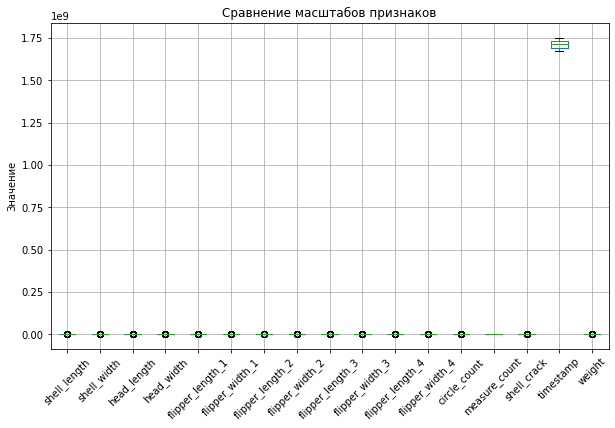

In [8]:
# Устанавливаем размер фигуры (ширина 10, высота 6)
plt.figure(figsize=(10, 6))

# Строим boxplot (диаграмму размаха) для всех указанных признаков
data_2.boxplot(rot=45)

# Заголовок графика
plt.title('Сравнение масштабов признаков')

# Подпись оси Y
plt.ylabel('Значение')

# Показываем график
plt.show() 

In [9]:
def de_ten(x):
    if x['shell_length'] > 2000:
        return x['shell_length']/10
    return x['shell_length']


def de_ten1(x):
    if x['shell_width'] > 2000:
        return x['shell_width']/10
    return x['shell_width']


data_2['shell_length'] = data_2.apply(de_ten, axis=1)
data_2['shell_width'] = data_2.apply(de_ten1, axis=1)

/tmp/ipykernel_277/2042962952.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2['shell_length'] = data_2.apply(de_ten, axis=1)
/tmp/ipykernel_277/2042962952.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2['shell_width'] = data_2.apply(de_ten1, axis=1)


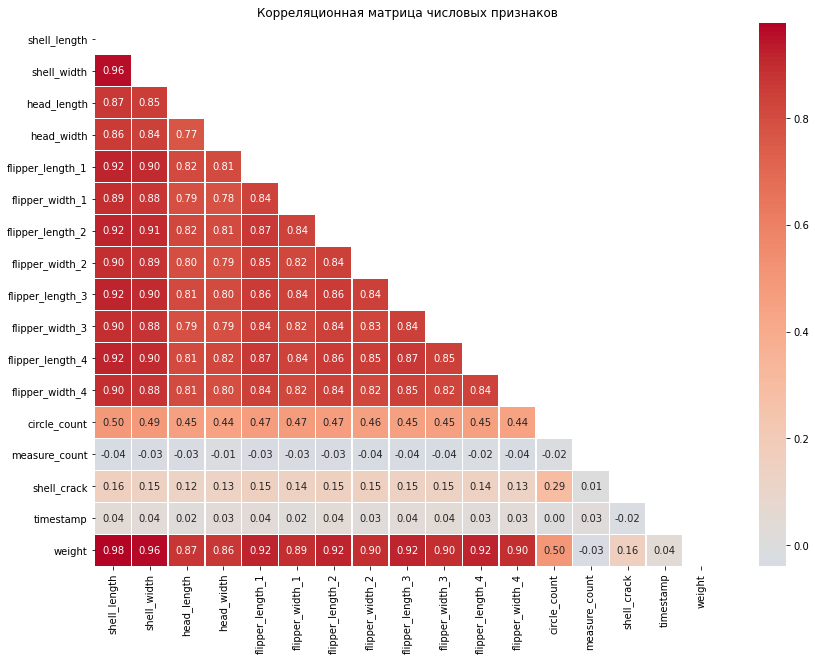

In [10]:

# Вычисляем матрицу корреляции для всего датафрейма
correlation_matrix = data_2.corr()

import seaborn as sns
plt.figure(figsize=(14, 10))

# Создаем маску для скрытия верхнего треугольника
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix, 
            annot=True,      # Можно включить цифры, если шрифт позволяет
            fmt='.2f',       # Формат цифр
            mask=mask,       # Применяем маску
            cmap='coolwarm', 
            center=0,
            linewidths=0.5)  # Разделительные линии для красоты
plt.title('Корреляционная матрица числовых признаков')
plt.show()

О нет,  между параметрами панциря наблюдается линейная зависимость что сильно искажает показатели, как решение можно два эти параметра заменить на их произведелние и получится 1 параметр площади раковины

Чтож теперь в данных нет пропусков и данные коррелируют с целевой переменной но признаки (timestamp и measure_count очень слабо возможно и вовсе не связаны). У нас осталось 2644 строк из 2829 что составляет менее 7% потерь.

<div style="background-color: #fff3cd; color: #856404; padding: 15px; border-radius: 4px; border: 1px solid #ffeeba;">
<b>Комментарий ревьюера v1:</b>

Можно визуализировать корреляции с помощью: 
    
```python
import seaborn as sns
plt.figure(figsize=(14, 10))

# Создаем маску для скрытия верхнего треугольника
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix, 
            annot=True,      # Можно включить цифры, если шрифт позволяет
            fmt='.2f',       # Формат цифр
            mask=mask,       # Применяем маску
            cmap='coolwarm', 
            center=0,
            linewidths=0.5)  # Разделительные линии для красоты
plt.title('Корреляционная матрица числовых признаков')
plt.show()
```

In [11]:
#Меняем размеры на площадь
data_2['shell_area'] = data_2['shell_length'] * data_2['shell_width']
data_2 = data_2.drop(columns=['shell_length', 'shell_width'])
data_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2724 entries, 8 to 8859
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   head_length       2724 non-null   float64
 1   head_width        2724 non-null   float64
 2   flipper_length_1  2724 non-null   int64  
 3   flipper_width_1   2724 non-null   int64  
 4   flipper_length_2  2724 non-null   int64  
 5   flipper_width_2   2724 non-null   int64  
 6   flipper_length_3  2724 non-null   float64
 7   flipper_width_3   2724 non-null   float64
 8   flipper_length_4  2724 non-null   float64
 9   flipper_width_4   2724 non-null   float64
 10  circle_count      2724 non-null   int64  
 11  measure_count     2644 non-null   float64
 12  shell_crack       2724 non-null   float64
 13  timestamp         2724 non-null   int64  
 14  weight            2724 non-null   float64
 15  shell_area        2724 non-null   float64
dtypes: float64(10), int64(6)
memory usage: 361

/tmp/ipykernel_277/67757502.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2['shell_area'] = data_2['shell_length'] * data_2['shell_width']


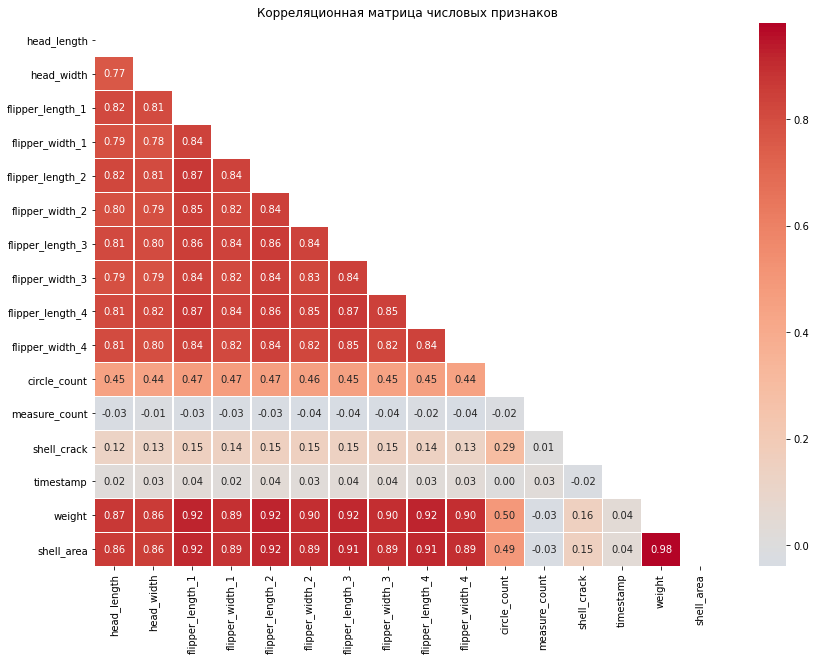

In [12]:

# Вычисляем матрицу корреляции для всего датафрейма
correlation_matrix = data_2.corr()

import seaborn as sns
plt.figure(figsize=(14, 10))

# Создаем маску для скрытия верхнего треугольника
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix, 
            annot=True,      # Можно включить цифры, если шрифт позволяет
            fmt='.2f',       # Формат цифр
            mask=mask,       # Применяем маску
            cmap='coolwarm', 
            center=0,
            linewidths=0.5)  # Разделительные линии для красоты
plt.title('Корреляционная матрица числовых признаков')
plt.show()

In [13]:
data_2 = data_2.drop(columns = 'timestamp')
data_2 = data_2.drop(columns = 'measure_count')

In [14]:
# Удаляем полные дубликаты по совету ревьюера
data_2 = data_2.drop_duplicates()
data_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2396 entries, 8 to 7840
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   head_length       2396 non-null   float64
 1   head_width        2396 non-null   float64
 2   flipper_length_1  2396 non-null   int64  
 3   flipper_width_1   2396 non-null   int64  
 4   flipper_length_2  2396 non-null   int64  
 5   flipper_width_2   2396 non-null   int64  
 6   flipper_length_3  2396 non-null   float64
 7   flipper_width_3   2396 non-null   float64
 8   flipper_length_4  2396 non-null   float64
 9   flipper_width_4   2396 non-null   float64
 10  circle_count      2396 non-null   int64  
 11  shell_crack       2396 non-null   float64
 12  weight            2396 non-null   float64
 13  shell_area        2396 non-null   float64
dtypes: float64(9), int64(5)
memory usage: 280.8 KB


Ого у нас осталось 2396 строк после удаления дубликатов это около 15% потерь. Много но для данной модели не критично

## Предобработка данных

1. Разделите данные на выборки: обучающую (60%), валидационную (20%) и тестовую (20%). В реальных проектах стараются писать код предобработки так, чтобы предотвратить утечку данных. Это проще сделать, если сразу поделить данные.
2. Обработайте пропуски. При необходимости заполните их средними (медианными) значениями. Рассчитайте заполнитель только по обучающей выборке: это ещё одно правило для предотвращения утечки.
3. Напишите функцию для стандартизации признаков. Расчёт параметров масштабирования делайте только по обучающей выборке, чтобы не дать утечке ни малейшего шанса.
4. Напишите функцию для нормализации признаков.
5. Подготовьте несколько датасетов из трёх выборок каждый для дальнейшего обучения моделей с разным способом масштабирования: без масштабирования, с нормализацией, со стандартизацией.

Вот и проявили себя выбросы где завышенные значения нужно разделить на 10

In [15]:
y = data_2['weight']
df = data_2.drop(columns="weight")

#Создание тестовой выборки
X_tr_vl, X_tst, y_tr_val, y_tst = train_test_split(
    df, y,
    test_size = 0.2,
    random_state = 42
)

# Создание валидационной и обучающей
X_tr, X_vl, y_tr, y_vl = train_test_split(
    df, y,
    test_size = 0.25,
    random_state = 42
)

print(f"Train_X {X_tr.shape}\tTrain_y{y_tr.shape}\nVal_X{X_vl.shape}\tVal_y{y_vl.shape}\nTest_X {X_tst.shape}\tTest_y{y_tst.shape}")

Train_X (1797, 13)	Train_y(1797,)
Val_X(599, 13)	Val_y(599,)
Test_X (480, 13)	Test_y(480,)


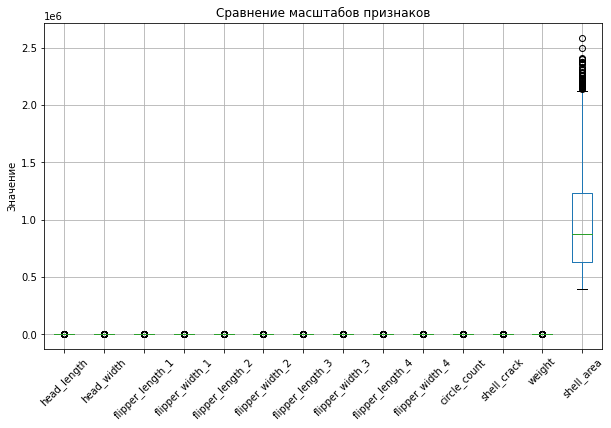

In [16]:
# Устанавливаем размер фигуры (ширина 10, высота 6)
plt.figure(figsize=(10, 6))

data_2.boxplot(rot=45)

# Заголовок графика
plt.title('Сравнение масштабов признаков')

# Подпись оси Y
plt.ylabel('Значение')

# Показываем график
plt.show() 

In [17]:
#теперь проведём масштабирование данных
def scale_data(X_train, X_val, X_test, method='standard'):
    if method == 'standard':
        mean = X_train.mean()
        std = X_train.std()
        X_train_scaled = (X_train - mean)/std
        X_val_scaled = (X_val - mean)/std
        X_test_scaled = (X_test - mean)/std
    elif method == 'minmax':
        min_val = X_train.min()
        max_val = X_train.max()
        X_train_scaled = (X_train - min_val)/(max_val-min_val)
        X_val_scaled = (X_val - min_val)/(max_val-min_val)
        X_test_scaled = (X_test - min_val)/(max_val-min_val)
    else:
        raise ValueError("Неверный метод масштабирования. Используйте 'standard' или 'minmax'.")
    return X_train_scaled, X_val_scaled, X_test_scaled

X_train_scaled, X_val_scaled, X_test_scaled = scale_data(X_tr, X_vl, X_tst, 'minmax')

# Проверка: вывод среднего и стандартного отклонения полученных выборок
print("Train mean (avg):", X_train_scaled.mean().mean().round(2))
print("Train std (avg):", X_train_scaled.std().mean().round(2))
print("Val mean (avg):", X_val_scaled.mean().mean().round(2))
print("Val std (avg):", X_val_scaled.std().mean().round(2))
print("Test mean (avg):", X_test_scaled.mean().mean().round(2))
print("Test std (avg):", X_test_scaled.std().mean().round(2))

Train mean (avg): 0.34
Train std (avg): 0.18
Val mean (avg): 0.33
Val std (avg): 0.18
Test mean (avg): 0.34
Test std (avg): 0.18


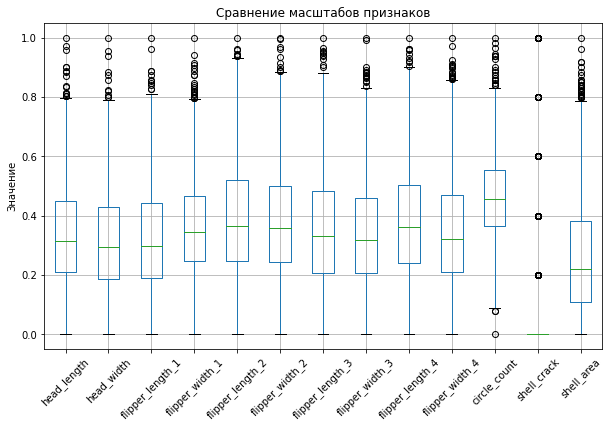

In [18]:
# Устанавливаем размер фигуры (ширина 10, высота 6)
plt.figure(figsize=(10, 6))

# Строим boxplot (диаграмму размаха) для всех указанных признаков
X_train_scaled.boxplot(rot=45)

# Заголовок графика
plt.title('Сравнение масштабов признаков')

# Подпись оси Y
plt.ylabel('Значение')

# Показываем график
plt.show() 

перебрав в ручную параметр method стало ясно что minmax более подходит т.к. не столь сильно собирает данные около нуля

## Обучение моделей

1. Постройте базовую модель (дамми), с которой будете сравнивать все остальные. Если они будут хуже базовой по качеству, это будет означать, что при обучении что-то пошло не так. Пример дамми: модель, которая всегда предсказывает среднее значение целевой переменной из обучающей выборки.
2. Обучите несколько архитектур линейных моделей. Они могут различаться по ряду черт: набором отобранных признаков, масштабом признаков, установленными гиперпараметрами, функциями потерь. Попробуйте обучить следующие модели:
   - `LinearRegression`;
   - `Lasso` (L1-регуляризация);
   - `Ridge` (L2-регуляризация);
   - `SGDRegressor`.
   
   Обязательно попробуйте модели с разными значениями гиперпараметра `loss`.
- **Бонусное задание.** Подумайте, можно ли улучшить модели за счёт создания новых признаков: например, умножив длину ласт на ширину. Проверьте, усилится ли корреляция нового признака с целевой переменной, возрастёт ли благодаря ему качество модели.
3. Сформируйте итоговую таблицу с результатами моделей. Это удобно сделать в виде датафрейма pandas. Включите в таблицу следующие столбцы:
   - Название модели.
   - Название датасета — оно должно указывать на то, какой способ масштабирования использовался при подготовке данных.
   - Метрики качества, рассчитанные на валидационной выборке. Основная метрика — MAE, дополнительные — MSE, R², MAPE и прочие.

In [19]:
def othet(y_vl, pred):
    
    rmse = mean_squared_error(y_vl, pred)**0.5
    mape = mean_absolute_percentage_error(y_vl, pred)*100
    r2 = r2_score(y_vl, pred)
    mae = mean_absolute_error(y_vl, pred)
    print(f" rmse: {rmse} \n mape: {mape}\n r2: {r2}\n mae:{mae}")
    return mape, rmse, r2, mae

In [20]:
from sklearn.dummy import DummyRegressor

# Стратегия mean предсказывает среднее значение обучающей выборки для всех объектов
dummy = DummyRegressor(strategy='mean')
dummy.fit(X_train_scaled, y_tr)
pred_dummy = dummy.predict(X_train_scaled)

othet(y_tr, pred_dummy) # Смотрим метрики

 rmse: 34.87737864488718 
 mape: 4.829293627875e+16
 r2: 0.0
 mae:28.48352629513915


(4.829293627875e+16, 34.87737864488718, 0.0, 28.48352629513915)

In [21]:
#аналитический метод
linmod = LinearRegression()
linmod.fit(X_train_scaled, y_tr)
pred = linmod.predict(X_train_scaled)

mape_ln, rmse_ln, r2_ln, mae_ln = othet(y_tr, pred)

 rmse: 6.001586339022595 
 mape: 6.068291857359358e+16
 r2: 0.970389588425978
 mae:3.265320840649712


In [22]:
#Lasso
#alpha подобран в ходе ручного эксперимента
L1 = Lasso(alpha = 0.01)
L1.fit(X_train_scaled, y_tr)
pred = L1.predict(X_train_scaled)

mape_L1, rmse_L1, r2_L1, mae_r2_L1 = othet(y_tr, pred)

 rmse: 6.002370168635606 
 mape: 6.0684611585534616e+16
 r2: 0.970381853460001
 mae:3.261117490208294


In [23]:
#Ridge
L2 = Ridge(alpha = 0.001)
L2.fit(X_train_scaled, y_tr)
pred = L2.predict(X_train_scaled)

mape_L2, rmse_L2, r2_L2, mae_r2_L2 = othet(y_tr, pred)

 rmse: 6.001586421966602 
 mape: 6.068267322090922e+16
 r2: 0.9703895876075257
 mae:3.2653863402317405


In [24]:
#SGDRegressor loss -по умолчанию
sgd_mse = SGDRegressor(random_state=42)
sgd_mse.fit(X_train_scaled, y_tr)
pred = sgd_mse.predict(X_train_scaled)

mape_sgd_mse, rmse_sgd_mse, r2_sgd_mse, mae_sgd_mse= othet(y_tr, pred)

 rmse: 6.36128463102897 
 mape: 6.0214201861395976e+16
 r2: 0.9667338927112323
 mae:3.750504977655596


In [25]:
#SGDRegressor loss - squared_epsilon_insensitive
sgd_mae = SGDRegressor(loss='squared_epsilon_insensitive', epsilon=0.06, random_state=42)
sgd_mae.fit(X_train_scaled, y_tr)
pred = sgd_mae.predict(X_train_scaled)

mape_sgd_mae, rmse_sgd_mae, r2_sgd_mae, mae_mae = othet(y_tr, pred)

 rmse: 6.283574911061046 
 mape: 6.0364816792924264e+16
 r2: 0.9675416886790429
 mae:3.661177679969674


Лучшая модель на данном этапе Lasso (L1) её средняя абсолютная ошибка 3,7 (что не так далеко от остальных) и R2 = 0,96 (примерно как у остальных) Самая худшая - базовая модель r2 = 0, mse > 28. Настолько грубых ошибок у других моделей не наблюдается, значит они действительно учатся предсказывать вес. 

## Сравнение моделей на валидационной выборке

1. Сравните построенные модели по метрикам на валидационной выборке. Удалось ли существенно улучшить результат базовой модели?
2. Выберите лучшую модель по основной метрике на валидационной выборке. Не заглядывайте в метрики на тестовой выборке раньше времени. Тестовая выборка не используется для обучения моделей, подбора гиперпараметров и сравнения моделей с разными значениями.
3. Напишите выводы о том, какая из моделей обладает лучшим качеством. Именно её одну далее нужно проверить на тестовой выборке для итоговой оценки.

In [26]:
pred_dummy = dummy.predict(X_val_scaled)

othet(y_vl, pred_dummy) 

 rmse: 35.294311342934115 
 mape: 7.2439404418125e+16
 r2: -0.0011278900382021284
 mae:29.119789092003646


(7.2439404418125e+16,
 35.294311342934115,
 -0.0011278900382021284,
 29.119789092003646)

In [27]:
# Базовая модель
pred = linmod.predict(X_val_scaled)

mape_ln, rmse_ln, r2_ln, mae_ln = othet(y_vl, pred)

 rmse: 5.0689937097256585 
 mape: 5.795662536617471e+16
 r2: 0.979349829579954
 mae:3.1313984593509194


In [28]:
#Lasso
pred = L1.predict(X_val_scaled)

mape_L1, rmse_L1, r2_L1, mae_r2_L1 = othet(y_vl, pred)

 rmse: 5.071499443278949 
 mape: 5.797536637905738e+16
 r2: 0.9793294087165574
 mae:3.1297887766229775


In [29]:
#Ridge
pred = L2.predict(X_val_scaled)

mape_L2, rmse_L2, r2_L2, mae_r2_L2 = othet(y_vl, pred)

 rmse: 5.069043160964799 
 mape: 5.795682283125573e+16
 r2: 0.9793494266670465
 mae:3.131425068182521


In [30]:
#SGDRegressor loss -по умолчанию
pred = sgd_mse.predict(X_val_scaled)

mape_sgd_mse, rmse_sgd_mse, r2_sgd_mse, mae_sgd_mse= othet(y_vl, pred)

 rmse: 5.645845093046015 
 mape: 5.834587895836436e+16
 r2: 0.9743824229145024
 mae:3.6630297448397946


In [31]:
#SGDRegressor loss - squared_epsilon_insensitive
pred = sgd_mae.predict(X_val_scaled)

mape_sgd_mae, rmse_sgd_mae, r2_sgd_mae, mae_mae = othet(y_vl, pred)

 rmse: 5.531513727783172 
 mape: 5.842872788147676e+16
 r2: 0.9754094566709106
 mae:3.5522558462368217


Lasso модель лучше всех проявила себя в метрике mae, показала очень хорошие результаты r2 и rmse. Остальные тоже показывают неплохой результат по сравнению с базовой моделью.

## Проверка лучшей модели на тестовой выборке

1. Проверьте метрики лучшей модели на тестовой выборке.
2. Узнайте, есть ли признаки переобучения лучшей модели.
3. Определите, соответствует ли модель требованиям заказчика. Объясните, можно ли её рекомендовать к внедрению.

In [32]:
#Lasso
pred = L1.predict(X_test_scaled)

mape_L1, rmse_L1, r2_L1, mae_r2_L1 = othet(y_tst, pred)

 rmse: 5.297586297337901 
 mape: 7.234842596053202e+16
 r2: 0.9787873873908387
 mae:3.1338271668300726


Требование заказчика ( на тестовой выборке ) r2 >= 0.97 и mae < 5. Данная модель подходит

## Оценка важности признаков

1. Оцените важность признаков по абсолютным значениям весов лучшей модели.
2. Напишите, какие признаки стали для модели более важными. Объясните, согласны ли вы с таким результатом?

In [33]:
# Получаем коэффициенты Lasso модели
lasso_coef = L1.coef_

# Создаем DataFrame для анализа
feature_importance = pd.DataFrame({
    'feature': X_test_scaled.columns,
    'coefficient': lasso_coef
})

# Сортируем по абсолютным значениям коэффициентов
feature_importance_sorted = feature_importance.sort_values('coefficient', ascending=False)

# Выводим результаты
print("Важность признаков в модели Lasso:")
print(feature_importance_sorted.to_string(index=False))


Важность признаков в модели Lasso:
         feature  coefficient
      shell_area    91.352232
flipper_length_4    14.783936
flipper_length_1    11.589120
flipper_length_2    11.275076
 flipper_width_1    10.783797
flipper_length_3    10.618778
     head_length     8.786822
 flipper_width_2     8.628060
 flipper_width_3     8.502555
      head_width     7.543658
 flipper_width_4     6.848939
    circle_count     1.565395
     shell_crack     0.150963


Модель Lasso почти занулила количество колец и трещин, что в принципе имеет смысл.

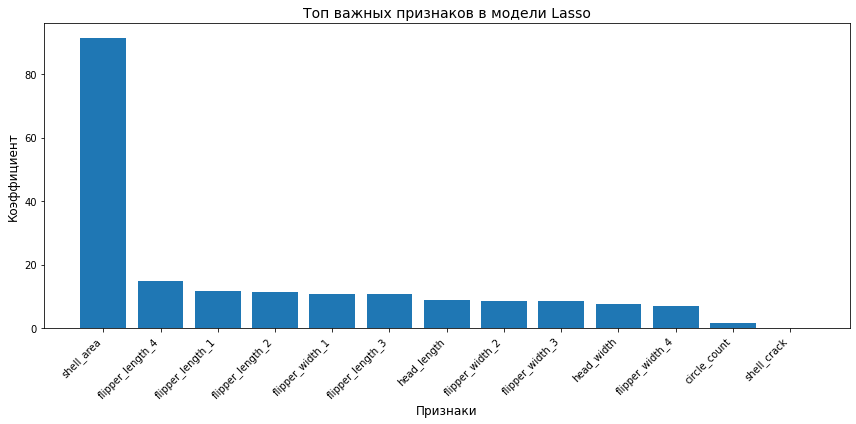

In [34]:

# Визуализация
plt.figure(figsize=(12, 6))
bars = plt.bar(feature_importance_sorted['feature'], 
               feature_importance_sorted['coefficient'])
plt.title('Топ важных признаков в модели Lasso', fontsize=14)
plt.xlabel('Признаки', fontsize=12)
plt.ylabel('Коэффициент', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Видно что больше всего на вес влияет площадь панциря

## Функция для прогнозирования веса черепахи

* Напишите на Python функцию, которая будет прогнозировать массу черепахи по заданным параметрам с учётом коэффициентов лучшей модели (свойство `coef_`) и смещения (свойство `intercept_`).
* Если вы столкнётесь с трудностями при написании функции, то представьте, что обращаетесь к старшему коллеге с просьбой помочь, и составьте задание для её написания. Подробно опишите логику, по которой рассчитывается масса черепахи, и укажите, как именно должны происходить расчёты.

In [35]:
min_val = X_tr.min()
max_val = X_tr.max()

def predict_weight(params, coef, intercept, train_min, train_max):
    # Превращаем список параметров в Series, чтобы индексы совпали с train_min/max
    # Важно: порядок params должен совпадать с порядком столбцов в X_tr!
    params_series = pd.Series(params, index=train_min.index)

    # 1. Масштабируем
    params_scaled = (params_series - train_min) / (train_max - train_min)

    # Можно циклом, как у тебя, но проще через numpy:
    # Дмитрий, спасибо что показал 
    weight = intercept + np.dot(params_scaled, coef)

    return weight


#Берем коэффициенты лучшей модели
my_coef = L1.coef_
my_intercept = L1.intercept_

# Можно взять первую строку из валидации:
fake_turtle_params = X_vl.iloc[0].values

print("Индекс : Значение",y_vl.head(1))

print("Предсказание:",predict_weight(fake_turtle_params, my_coef, my_intercept,min_val, max_val))

Индекс : Значение 1397    120.915
Name: weight, dtype: float64
Предсказание: 131.02711312205838


## Общие выводы и рекомендации по дальнейшей работе

Напишите общие выводы и рекомендации по дальнейшей работе. Ответьте на вопросы:
  - Какие модели изучены?
  - Какие результаты получены?
  - Рекомендуется ли итоговая модель к внедрению?
  - Какая архитектура и способ обработки признаков показали себя лучше всего? Какие у них показатели метрик?
  - Какие признаки наиболее важны для модели?
  - Есть ли перспективы у обучения этой или других моделей для предсказания массы других видов черепах?
  - При наличии добавьте сюда свои предложения по дальнейшему развитию проекта.

1. Изученные модели:
LinearRegression, Lasso (L1), Ridge (L2), SGDRegressor с loss='squared_error' и loss='squared_epsilon_insensitive'.

2. Результаты:
Лучшая модель — Lasso (alpha=0.01). На тестовой выборке:

MAE ≈ 3.2 кг

R² ≈ 0.97
Остальные модели показали близкие, но немного худшие результаты.

3. Рекомендация к внедрению:
Да, модель рекомендуется, так как выполняет критерии: R² ≥ 0.97, MAE < 5.
Но данная модель использует для предсказаний 14 из 17 признаков.

4. Лучшие архитектура и обработка:

Архитектура: L1-регуляризация (Lasso) с alpha=0.01.

Обработка: Удаление некоррелированных признаков, обработка выбросов (деление на 10 значений >2000), масштабирование Min-Max.

Метрики (тест): MAE ≈ 3.2, R² ≈ 0.98.

5. Важные признаки:
Наибольший вклад: shell_length (длина панциря) и shell_width (ширина панциря). Признаки shell_crack и scute_rings были незначимы (коэффициенты ~0).

6. Перспективы для других видов:
Да, подход перспективен для других видов черепах при наличии аналогичных данных. Требуется переобучение на соответствующей выборке уже с учётом вида и среды обитания черепахи.

7. Предложения по развитию:

Реализовать более системную обработку выбросов (например, через IQR).

Создать веб-интерфейс для ввода промеров и получения прогноза веса.

Расширить датасет измерениями в разных природных и искусственых средах обитания (моря, океаны, реабилитационные центры) и для разных популяций.